In [1]:
# 1
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2
# Get project files
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

# !unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# Each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
# Image preprocessors
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

# Generate batches of training data from the specified directory
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'binary')

# Generate batches of validation data from the specified directory
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'binary')

# Generate batches of test data from the specified directory
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    shuffle = False,
    classes = ['test'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


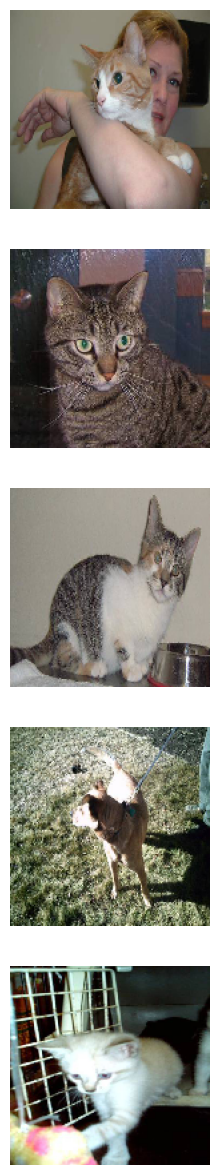

In [4]:
# 4
# Plot a grid of images with optional probability labels
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
    
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [5]:
# 5
# Create an ImageDataGenerator object for data augmentation
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = .15,
    height_shift_range = .15,
    shear_range = 0.15,
    zoom_range = 0.30,
    horizontal_flip = True)

Found 2000 images belonging to 2 classes.


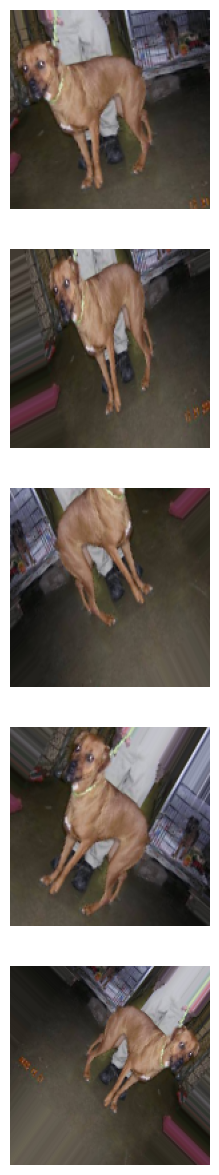

In [6]:
# 6
# Generate batches of augmented training data from the specified directory
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                     directory = train_dir,
                                                     target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode = 'binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
# 7
# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [8]:
# 8
# Define steps_per_epoch and validation_steps
steps_per_epoch = total_train // batch_size
validation_steps = total_val // batch_size

# Train the model
history = model.fit(                 # Commenting out so model isn't re fit
    train_data_gen,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = validation_steps)

Epoch 1/15


15/15 [==============================] - 16s 1s/step - loss: 1.2556 - accuracy: 0.4824 - val_loss: 0.6912 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6936 - accuracy: 0.5134 - val_loss: 0.6921 - val_accuracy: 0.5067
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6892 - accuracy: 0.5374 - val_loss: 0.6905 - val_accuracy: 0.5145
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.6795 - accuracy: 0.5689 - val_loss: 0.6632 - val_accuracy: 0.5781
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6725 - accuracy: 0.5897 - val_loss: 0.6476 - val_accuracy: 0.5971
Epoch 6/15
15/15 [==============================] - 15s 1s/step - loss: 0.6637 - accuracy: 0.5956 - val_loss: 0.6399 - val_accuracy: 0.6283
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.6240 - accuracy: 0.6474 - val_loss: 0.5956 - val_accuracy: 0.6786
Epoch 8/15
15/15 [

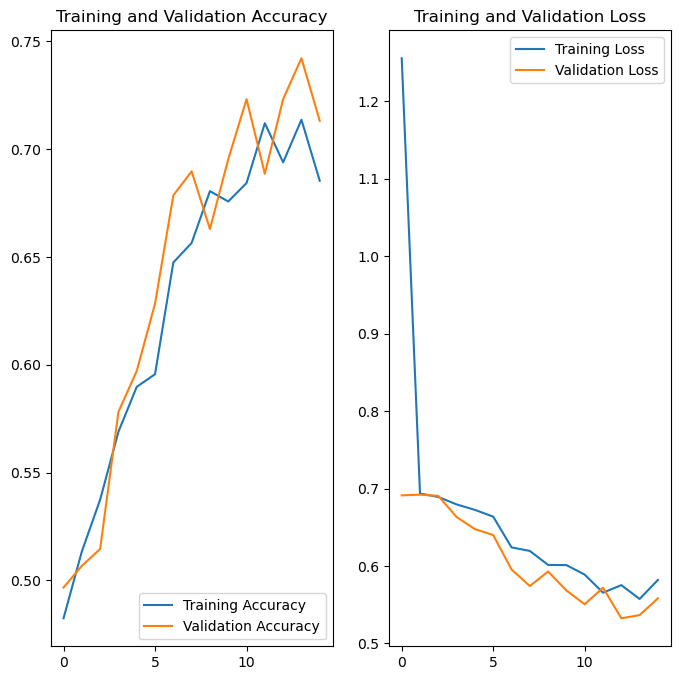

In [9]:
# 9
# Extract training accuracy and validation accuracy from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract training loss and validation loss from history object
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Plot training accuracy and validation accuracy over epochs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training loss and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
# 10
# Predict probabilities for the test data using the trained model
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 0s 207ms/step


array([0.37653357, 0.4901176 , 0.12889875, 0.54877603, 0.60283536,
       0.4583562 , 0.55208254, 0.28439918, 0.5253984 , 0.8559323 ,
       0.33085915, 0.5404889 , 0.24572107, 0.2567955 , 0.4955439 ,
       0.6968766 , 0.55116874, 0.6655824 , 0.60838455, 0.6549142 ,
       0.21655057, 0.47703528, 0.35685182, 0.46899873, 0.501986  ,
       0.44317043, 0.57942   , 0.29086766, 0.38704863, 0.55464756,
       0.2391411 , 0.34095293, 0.6065212 , 0.99822915, 0.23671526,
       0.631061  , 0.97467154, 0.67456335, 0.32033184, 0.3597381 ,
       0.35492888, 0.46237475, 0.8902427 , 0.60473025, 0.148605  ,
       0.25520357, 0.5281891 , 0.25930113, 0.25549698, 0.34733385],
      dtype=float32)

In [11]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
